In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from skimage.transform import resize
import math
from math import pi
import scipy.stats
from selenium import webdriver
import warnings
import os

import matplotlib as mpl
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.projections import get_projection_class
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects

import main

from mplsoccer import Pitch, add_image, VerticalPitch, FontManager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap

from scipy.spatial import ConvexHull

from config import *
from highlight_text import fig_text

warnings.filterwarnings('ignore')

In [3]:
import pickle
with open(file=f'/work/assets/whoscored/barcelona/ids/2122/2122#17.json',mode="rb") as json:
    ids = pickle.load(json)
    
pIds = {i:n for i,n in ids["home"].keys()}
pIds

{80774: 'Marc-André ter Stegen',
 236511: 'Clément Lenglet',
 368091: 'Eric García',
 384711: 'Ronald Araújo',
 44721: 'Sergio Busquets',
 279423: 'Frenkie de Jong',
 44288: 'Jordi Alba',
 422937: 'Gavi',
 299513: 'Ousmane Dembélé',
 396158: 'Ferrán Jutglà',
 427283: 'Abdessamad Ezzalzouli',
 372827: 'Riqui Puig',
 422938: 'Balde',
 422939: 'Nicolás González Iglesias',
 76202: 'Neto',
 80767: 'Philippe Coutinho',
 89931: 'Samuel Umtiti',
 68585: 'Luuk de Jong',
 367164: 'Iñaki Peña',
 397469: 'Óscar Mingueza',
 427284: 'Álvaro Sanz',
 429921: 'Guillem Jaime'}

In [131]:
# bdf = pd.read_csv(f'/work/assets/whoscored/barcelona/match/2021/2021#0.csv')
playerId = input("Enter player Id(please use accented characters where needed:")
team = input("Enter Player's team name:")
season = 2021
matchOrSeason = input("Enter 'match' or 'season', if you want to make Dataframe which contains all match in the season, you should 'season' if not 'match'")

if matchOrSeason == "season":
    dfs =[]
    for i in range(1,15):
        df = pd.read_csv(f'/work/assets/whoscored/{team}/match/{season}/eventsData/new/{season}#{i}.csv')
        dfs.append(df)

    df = pd.concat(dfs)
else:
    df = pd.read_csv(f'/work/assets/whoscored/{team}/match/{season}/eventsData/new/2122#17.csv')


typew = {'value': "Pass", 'displayName': 'Successful'}
df = df[(df['playerId']==int(playerId)) & 
#         (df['outcomeType'] == typew['displayName']) & 
        (df['type'] == typew['value'])][['x', 'y', 'endX', 'endY','outcomeType']]
import numpy as np
df['x'] = df['x']*1.2
df['endX'] =df['endX']*1.2
df['y']=df['y']*0.8
df['endY']=df['endY']*0.8
df['dist1']=np.sqrt((120-df.x)**2 + (40-df.y)**2)
df['dist2']=np.sqrt((120-df.endX)**2 + (40-df.endY)**2)
df['distdiff'] = df['dist1']-df['dist2']
df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)

xT = pd.read_csv("/work/assets/xT_Grid.csv",header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape
df["x_bin"] = pd.cut(x=df["x"],bins=xT_cols,labels=False)
df["y_bin"] = pd.cut(x=df["y"],bins=xT_rows,labels=False)
df["endX_bin"] = pd.cut(x=df["endX"],bins=xT_cols,labels=False)
df["endY_bin"] = pd.cut(x=df["endY"],bins=xT_rows,labels=False)
df["start_zone_value"] = df[["x_bin","y_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
df["end_zone_value"] = df[["endX_bin","endY_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
df["xT"] = df['end_zone_value'] - df['start_zone_value']
# passAc = df.query("(x<60)&(endX<60)&(distdiff>=30)")
# passBc = df.query("(x<60)&(endX>60)&(distdiff>=15)")
# passCc = df.query("(x>60)&(endX>60)&(distdiff>=10)")
passMm = df[df["outcomeType"]!="Successful"]
pass80 = df.query("(x>80)")
pass50 = df.query("(80>x>50)")
pass00 = df.query("50>x")
passAc = df
# passBc = df
# passCc = df
# passAc = passAc.append(passBc)
# passAc = passAc.append(passCc)


Enter player Id(please use accented characters where needed: 140088
Enter Player's team name: wolves
Enter 'match' or 'season', if you want to make Dataframe which contains all match in the season, you should 'season' if not 'match' season


In [8]:
#Loading Some Fonts
smooch = "https://github.com/googlefonts/smooch/blob/master/fonts/ttf/Smooch-Regular.ttf?raw=true"
spaceMono_italy = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
spaceMono_dance = "https://github.com/googlefonts/moondance/tree/master/fonts/ttf?raw=true"
# rubik = 'https://github.com/googlefonts/rubik/tree/main/fonts/ttf/Rubik-Medium.ttf?raw=true'
# meow = "https://github.com/googlefonts/meow-script/tree/master/fonts/ttf?raw=true"
# road = "https://github.com/googlefonts/road-rage/tree/master/fonts/ttf?raw=true"

smoochFont = FontManager(smooch)
monoIFont = FontManager(spaceMono_italy)
monoBFont = FontManager(spaceMono_bold)
monoDFont = FontManager(spaceMono_dance)

# rubikFont = FontManager(rubik)
# meowFont = FontManager(meow)
# roadFont = FontManager(road)

In [55]:
pitch_color = '#131313'
text_color = '#ffffff'
oneColor = '#B94B5F'
theOtherColor = '#4A5EB8'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, "#D7B013"], N=100)

myFont = monoIFont

In [10]:
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = '#131313',
    line_color = '#495E62', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)

In [127]:
def plotScatterMap(df,ax,time=None):
    #pdf = df[df['playerId']==playerId]  
    pdf = df
    if time is not None:
        pdf = pdf[pdf["minute"]<time]
        
    x = pdf['x']
    y = pdf['y']
    endX = pdf['endX']
    endY = pdf['endY']

    cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#13B9D6","#e76f51","#D61327"])
    color = cmap(pdf["xT"]/pdf["xT"].max())
    
    # ax.scatter(y,x,color="#dc2f02",s=100)  
    # ax.scatter(y,x,color="#ffba08",s=150,alpha=.3)   
    ax.scatter(y,x,color=color,s=100,alpha=.8,zorder=1)  
    ax.scatter(y,x,color=color,s=350,alpha=.3,zorder=1)  
    
    for index, row in pdf.iterrows():
        if row["dist"] > 36.57:
            if row["outcomeType"] == "Successful":
                ax.annotate("",
                       xy=(row['endY'], row['endX']),xytext=(row["y"],row["x"]),
                       arrowprops={'arrowstyle':"-|>,head_width=.7,head_length=.9",
                                   'fc':'#76c893',
                                   'ec':'#76c893',
                                   'alpha':.5,
                                    "connectionstyle":"angle3, angleA = 0, angleB = 95"
                                    #"connectionstyle":"arc, angleA = 90, angleB = 0"
                                  })
 
            else:
                ax.annotate("",
                            xy=(row['endY'],row['endX']),
                            xytext=(row["y"],row["x"]),
                            arrowprops={'arrowstyle':"-|>,head_width=.7,head_length=.9",
                                        'fc':"#7400b8",
                                        'ec':"#7400b8",
                                        'alpha':.5,
                                        "connectionstyle":"angle3, angleA = 0, angleB = 95"})

        else:
            if row["outcomeType"] == "Successful":
                ax.annotate("",
                            xy=(row['endY'],row['endX']),
                            xytext=(row["y"],row["x"]),
                            arrowprops={'arrowstyle':"-|>,head_width=.7,head_length=.9",
                                        'fc':'#76c893',
                                        'ec':'#76c893',
                                        'alpha':.5,
                                       },
                            zorder=1)
            else:
                ax.annotate("",
                            xy=(row['endY'],row['endX']),
                            xytext=(row["y"],row["x"]),
                            arrowprops={'arrowstyle':"-|>,head_width=.7,head_length=.9",
                                        'fc':"#7400b8",
                                        'ec':"#7400b8",
                                        'alpha':.5,
                                         },
                            zorder=1)
                
    return None

def plotBinStatHeatmap(pitch,ax,idx,df,font):

    # bin_statistic = pitch.bin_statistic_positional(df["x"], df["y"], statistic='count',
    #                                               positional='full', normalize=True)

    # pitch.heatmap_positional(bin_statistic, ax=ax['pitch'][idx],
    #                         cmap=cmap, edgecolors='#495E62',alpha=1, linewidth=.05)

    # labels = pitch.label_heatmap(bin_statistic, color=text_color, fontsize=18,
    #                             ax=ax['pitch'][idx], ha='center', va='center',
    #                             str_format='{:.0%}',fontproperties=font.prop)

    stats = pitch.bin_statistic(df["x"], df["y"], 
                                statistic='count', 
                                normalize=True)
    
    pitch.heatmap(stats, edgecolors='black', cmap=cmapB, ax=ax['pitch'][idx])
    
    path_eff = [path_effects.Stroke(linewidth=0.5, foreground='#D62A13')]
    
    text = pitch.label_heatmap(stats,
                               color='#1F1903',
                               ax=ax['pitch'][idx],
                               fontsize=20, 
                               ha='center',
                               va='center',
                               path_effects=path_eff,
                               str_format='{:.0%}')



In [46]:
df

,x,y,endX,endY,outcomeType,dist1,dist2,distdiff,dist,x_bin,y_bin,endX_bin,endY_bin,start_zone_value,end_zone_value,xT
894,111.72,8.24,109.56,36.80,Unsuccessful,32.821578,10.919414,21.902164,28.641564,11,0,10,3,0.037926,0.108051,0.070125
917,55.20,13.12,45.00,10.72,Successful,70.153934,80.512846,-10.358913,10.478550,5,1,3,1,0.013845,0.010595,-0.003250
955,54.36,0.00,76.80,7.84,Unsuccessful,76.867481,53.856342,23.011139,23.770133,5,0,7,0,0.012483,0.017451,0.004967
987,45.12,0.00,50.16,20.48,Successful,84.894136,72.516591,12.377545,21.091041,4,0,4,2,0.011263,0.012692,0.001429
1016,113.88,11.76,110.64,45.60,Unsuccessful,28.895536,10.907319,17.988217,33.994753,11,1,10,4,0.046477,0.108051,0.061574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,92.88,7.28,68.04,18.72,Successful,42.498151,56.148731,-13.650581,27.347746,9,0,6,1,0.027563,0.016118,-0.011445
1421,87.36,22.16,90.36,9.52,Successful,37.197247,42.515409,-5.318162,12.991135,8,2,8,0,0.024122,0.021221,-0.002901
1442,84.84,24.24,92.16,33.28,Unsuccessful,38.530549,28.639553,9.890996,11.632025,8,2,8,3,0.024122,0.023851,-0.000271
1452,83.04,25.68,84.84,49.44,Successful,39.637154,36.405208,3.231946,23.828084,8,3,8,4,0.023851,0.023851,0.000000


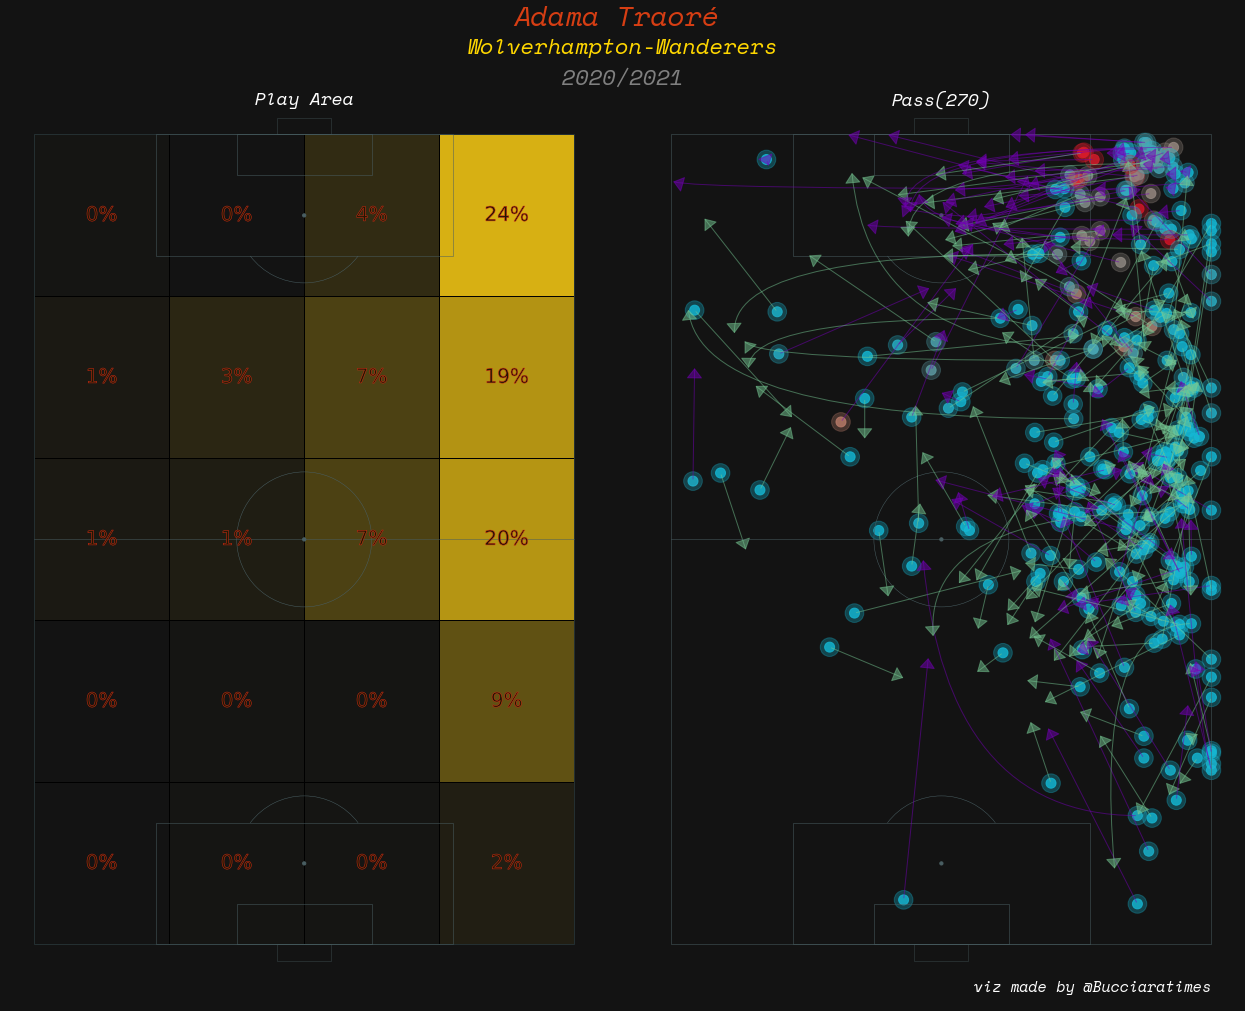

In [132]:
fig,axs = pitch.grid(nrows=1, ncols=2, figheight=15,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_height=0.08, grid_height=0.8)

fig.set_facecolor("#131313")

axs['pitch'][0].invert_xaxis()
axs['pitch'][1].invert_xaxis()

plotBinStatHeatmap(pitch,axs,0,df,myFont)
plotScatterMap(df,axs['pitch'][1])

playerName = "Adama Traoré"
season = "2020/2021"
axs['title'].text(0.5, 0.56, f'Wolverhampton-Wanderers', color='gold', va='center', ha='center', fontproperties=myFont.prop, fontsize=22)
axs['title'].text(0.495, 0.9, f'{playerName}', color='#D63E13', va='center', ha='center', fontproperties=myFont.prop, fontsize=28)
axs['title'].text(0.5, 0.21, f'{season}', color='gray', va='center', ha='center', fontproperties=myFont.prop, fontsize=22)

axs['pitch'][1].text(40,125,f'Pass({len(passAc)})',color=text_color, va='center', ha='center', fontproperties=monoIFont.prop,fontsize=18)
axs['pitch'][0].text(40,125,f'Play Area', color=text_color, va='center', ha='center', fontproperties=monoIFont.prop,fontsize=18)

# axs['endnote'].text(0.09, 0.5, "data via whoscored", va='center', ha='right', fontsize=15, fontproperties=myFont.prop, color=text_color)
axs['endnote'].text(1, 0.5, "viz made by @Bucciaratimes", va='center', ha='right', fontsize=15, fontproperties=myFont.prop, color=text_color)

plt.savefig(f'/work/output/barcelona/{playerName}2021.png', dpi=300, bbox_inches="tight",facecolor='#131313')

{'statistic': array([[0.      , 0.      , 0.015625, 0.0625  , 0.015625],
       [0.      , 0.      , 0.015625, 0.109375, 0.      ],
       [0.      , 0.      , 0.15625 , 0.09375 , 0.015625],
       [0.      , 0.      , 0.1875  , 0.265625, 0.0625  ]]), 'x_grid': array([[  0.,  24.,  48.,  72.,  96., 120.],
       [  0.,  24.,  48.,  72.,  96., 120.],
       [  0.,  24.,  48.,  72.,  96., 120.],
       [  0.,  24.,  48.,  72.,  96., 120.],
       [  0.,  24.,  48.,  72.,  96., 120.]]), 'y_grid': array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [20., 20., 20., 20., 20., 20.],
       [40., 40., 40., 40., 40., 40.],
       [60., 60., 60., 60., 60., 60.],
       [80., 80., 80., 80., 80., 80.]]), 'cx': array([[ 12.,  36.,  60.,  84., 108.],
       [ 12.,  36.,  60.,  84., 108.],
       [ 12.,  36.,  60.,  84., 108.],
       [ 12.,  36.,  60.,  84., 108.]]), 'cy': array([[10., 10., 10., 10., 10.],
       [30., 30., 30., 30., 30.],
       [50., 50., 50., 50., 50.],
       [70., 70., 70., 70., 70.]

Text(1, 0.5, 'viz made by @Bucciaratimes')

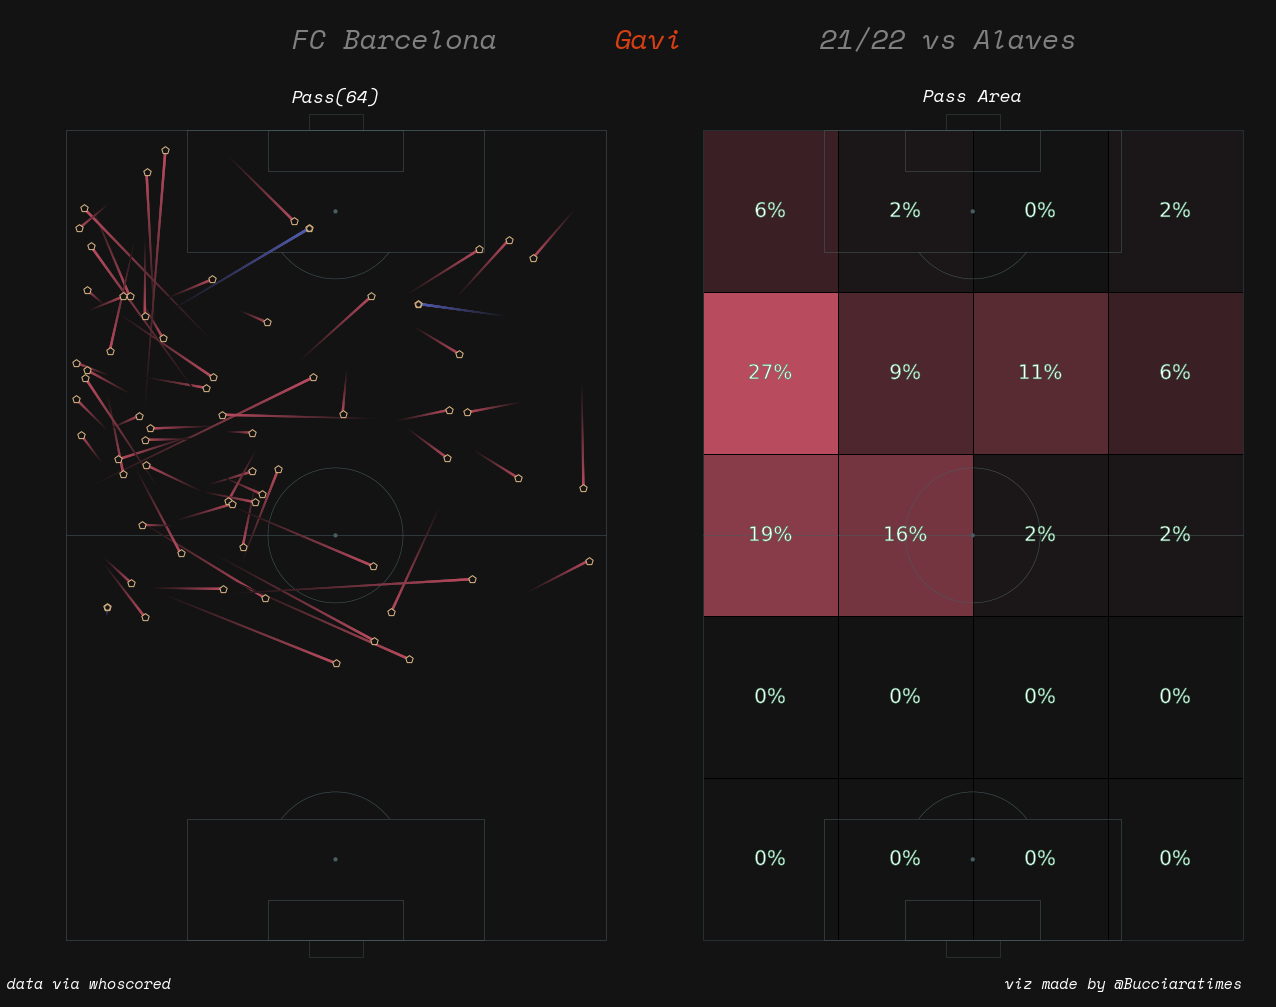

In [9]:
fig, axs = pitch.grid(nrows=1, ncols=2, figheight=15,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_height=0.08, grid_height=0.8)

axs['pitch'][0].invert_xaxis()
axs['pitch'][1].invert_xaxis()

fig.set_facecolor(pitch_color)

Lines= pitch.lines(xstart=passAc.x,ystart=passAc.y,xend=passAc.endX,yend=passAc.endY,cmap=cmapA,comet=True,lw=2.5,ax=axs['pitch'][0])

scatter = pitch.scatter(passAc.endX,passAc.endY,color=pitch_color,ax=axs['pitch'][0],zorder=3,ec="#DEB887",lw=1,s=60,marker="p")


# miss pass plot

Lines= pitch.lines(xstart=passMm.x,ystart=passMm.y,xend=passMm.endX,yend=passMm.endY,cmap=cmapB,comet=True,lw=2.5,ax=axs['pitch'][0])

scatter = pitch.scatter(passMm.endX,passMm.endY,color=pitch_color,ax=axs['pitch'][0],zorder=3,ec="#DEB887",lw=1,s=30)

# bin_statistic = pitch.bin_statistic_positional(passAc.x, passAc.y, statistic='count',
#                                                positional='full', normalize=True)

# pitch.heatmap_positional(bin_statistic, ax=axs['pitch'][1],
#                          cmap=cmapB, edgecolors='#495E62',alpha=1, linewidth=.05)

# labels = pitch.label_heatmap(bin_statistic, color=text_color, fontsize=18,
#                              ax=axs['pitch'][1], ha='center', va='center',
#                              str_format='{:.0%}',fontproperties=font_regular2.prop)


stats = pitch.bin_statistic(passAc.x, passAc.y, statistic='count', normalize=True)
pitch.heatmap(stats, edgecolors='black', cmap=cmapA, ax=axs['pitch'][1])

# stats['statistic'] = stats['statistic'].astype(int)
path_eff = [path_effects.Stroke(linewidth=0.5, foreground='seagreen')]
text = pitch.label_heatmap(stats,color='white',ax=axs['pitch'][1],fontsize=20, ha='center', va='center', path_effects=path_eff,str_format='{:.0%}')

print(stats)

from highlight_text import ax_text

# axs['title'].text(0.5, 0.7,  f'{playerName} vs {playerName} : Progressive Passing', color='#000009',va='center', ha='center', fontproperties=font_bold.prop, fontsize=25)

playerName = pIds[int(playerId)]
season = '21/22 vs Alaves'

axs['title'].text(0.28, 0.6, f'FC Barcelona', color='gray', va='center', ha='center', fontproperties=myFont.prop, fontsize=28)
axs['title'].text(0.495, 0.6, f'{playerName}', color='#D63E13', va='center', ha='center', fontproperties=myFont.prop, fontsize=28)
axs['title'].text(0.75, 0.6, f'{season}', color='gray', va='center', ha='center', fontproperties=myFont.prop, fontsize=28)

axs['pitch'][0].text(40,125,f'Pass({len(passAc)})',color=text_color, va='center', ha='center', fontproperties=monoIFont.prop,fontsize=18)
axs['pitch'][1].text(40,125,f'Pass Area', color=text_color, va='center', ha='center', fontproperties=monoIFont.prop,fontsize=18)

axs['endnote'].text(0.09, 0.5, "data via whoscored", va='center', ha='right', fontsize=15, fontproperties=myFont.prop, color=text_color)
axs['endnote'].text(1, 0.5, "viz made by @Bucciaratimes", va='center', ha='right', fontsize=15, fontproperties=myFont.prop, color=text_color)


# plt.savefig(f'/work/output/barcelona/{playerName}11111.png', dpi=300, bbox_inches="tight",facecolor='#131313')

In [2]:
loc_dict = { # 3421
    (80774,'Ter'):(.5, .1),# GK
    (379205,'Dest'):(.9,.63),# RSB
    (44288,'Alba'):(.1,.63),# LSB
    (397469,'Mingueza'):(.77,.28),# RCB
    (236511,'Lenglet'):(.23,.28),# LCB
#     (384711,'Araujo'):(.5,.3),# CB
    (12712,'Piqué'):(.5,.3),# CB
    (279423,'Busquets'):(.7,.5),# RCM
    (44721,'Frenkie'):(.3,.5),# LCM
    (11119,'Messi'):(.67,.72),# RCAM
    (402197,'Pedri'):(.33,.72),# LCAM
#     (299513,'Dembele'):(.5, .82)# CF
    (80241,'Griezmann'):(.5, .82)# CF
}

In [3]:
targetDf = pd.read_csv('/work/assets/whoscored/barcelona/match/2021/2021#32.csv')
teamId = 65
teamName = 'Barcelona'
opponentId = targetDf['teamId'][targetDf['teamId'] != teamId][0]
opponentName = 'Villarreal'

In [4]:
def plot_inset(axes, pdf, x, y, name):
    pos = inset_axes(axes,width=1.3,height=2.8,loc=10,bbox_to_anchor=(x,y),bbox_transform=axes.transAxes,borderpad=0.0) 
    pos.set_title(name,color=titleColor,fontweight='bold',fontsize=14,fontname='Noto sans')
    pitch.draw(ax=pos)

def plotmap(targetDf, teamId,teamName,axesNum):
    df = targetDf
    df = df[df['teamId']==teamId]
    
    for (player_id,player_name), (x,y) in loc_dict.items():
        player_df = df[df['playerId']==player_id]
        plot_inset(axes=axes[axesNum], pdf=player_df, x=x, y=y,name=player_name)

    axes[axesNum].set_title(f"{teamName}",color=titleColor,fontsize=18,fontweight='bold')

def plotHeatmap(targetDf, teamId,teamName,axesNum):
    df = targetDf
    df = df[df['teamId']==teamId]
    passesdf = df[df['type.value']==1]
    passesdf['playerId'] = passesdf['playerId'].astype('int')

    df = passesdf
    df = df.reset_index()

    df['x']=df['x']*1.2
    df['endX']=df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8

    for (player_id,player_name), (x,y) in loc_dict.items():
        player_df = df[df['playerId']==player_id]
        plot_inset(axes=axes[axesNum], pdf=player_df, x=x, y=y,name=player_name)

    axes[axesNum].set_title(f"{teamName} | Heat Map",color='#DEB887',fontsize=18,fontweight='bold')
    

def plot_convexfull(axes,pdf,x,y,name):
    pos = inset_axes(axes,width=1.2,height=2.92,loc=10,bbox_to_anchor=(x,y),bbox_transform=axes.transAxes,borderpad=0.0)
    pitch.draw(ax=pos)
    pos.invert_xaxis()
    points = pdf[['x','y']].values
    if len(points) > 2:
        points[:,0] = points[:,0] * 1.2
        points[:,1] = points[:,1] * .8
        hull = ConvexHull(pdf[['x','y']])
        for simplex in hull.simplices:
            pos.scatter(points[:,1],points[:,0],color="blue",s=8)
            pos.fill(points[hull.vertices,1], points[hull.vertices,0], 'red', alpha=.7)
    else:
        pos.scatter(points[:,1],points[:,0],color='blue',s=8)
    pos.set_title(name,color=whiteTheme["textColor"],fontweight='bold',fontsize=12)
    
def plot_pass(axes,pdf,x,y,name):

    pos = inset_axes(axes,width=1.2,height=2.92,loc=10,bbox_to_anchor=(x,y),bbox_transform=axes.transAxes,borderpad=0.0)
    pitch.draw(ax=pos)
    pos.invert_xaxis()

    for i in range(len(pdf['x'])):
        locX = pdf['x'].iloc[i]
        locY = pdf['y'].iloc[i]  
        endX = pdf['endX'].iloc[i]
        endY = pdf['endY'].iloc[i]  
        pos.annotate('',
                     xy=(endY,endX),
                     xytext=(locY,locX),
                     arrowprops={'arrowstyle':"wedge,tail_width=0.1",
                                'fc':'#00CC99',
                                'ec':'none'}, 
                     zorder=2)


    pos.set_title(name,color='#DEB887',fontweight='bold',fontsize=12)
    

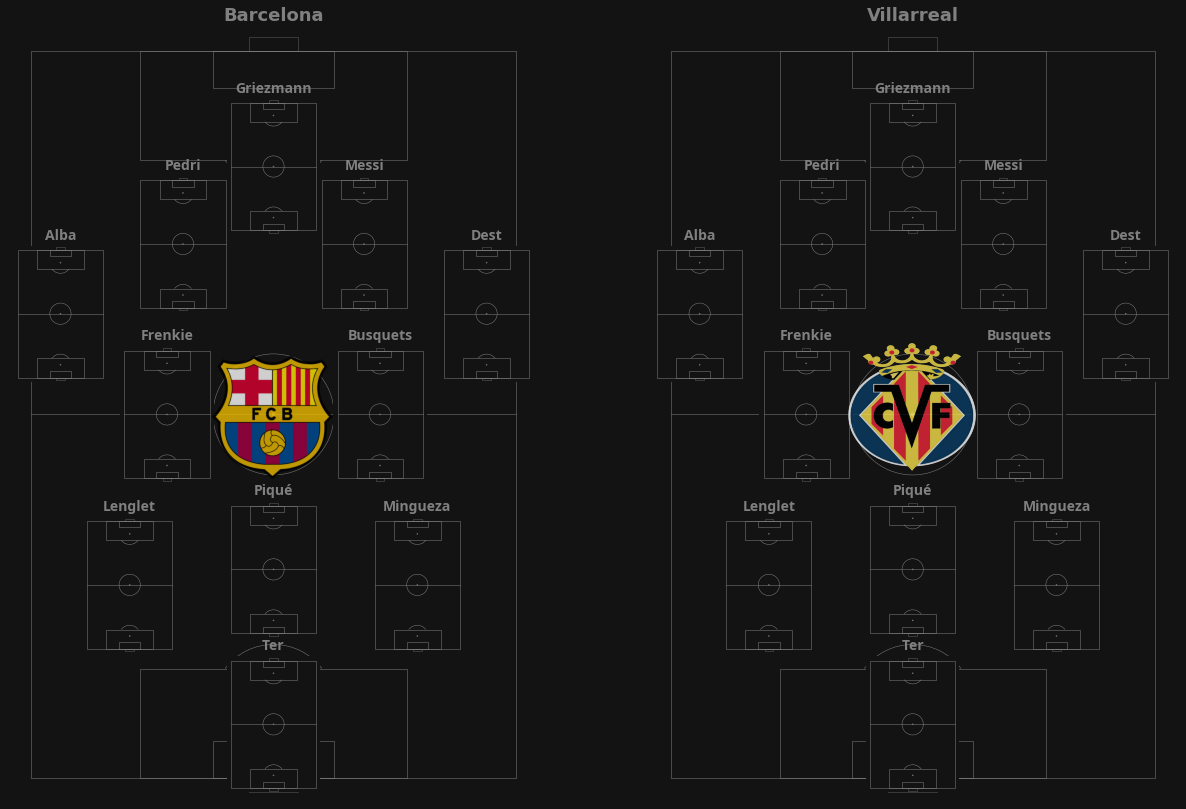

In [8]:
figBackColor ="#131313"
axBackColor ="#131313"
titleColor ="gray"

fig, axes = plt.subplots(1,2,figsize=(21,18))
fig.set_facecolor(figBackColor)


im = imread(os.path.join('/work/assets/image/','barcelona_small2.png'))
im = resize(im, (128, 125))
fig.figimage(im, 210, 328, alpha=.8)

im = imread(os.path.join('/work/assets/image/','villarreal-club-de-futbol-logo-DB6A3B38E2-seeklogo.com.png'))
im = resize(im, (128, 128))
fig.figimage(im, 848, 338, alpha=.8)

pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color=axBackColor,
    line_color=titleColor, 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)

pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])

plotmap(targetDf,teamId,teamName,0)
plotmap(targetDf,opponentId,opponentName,1)
    

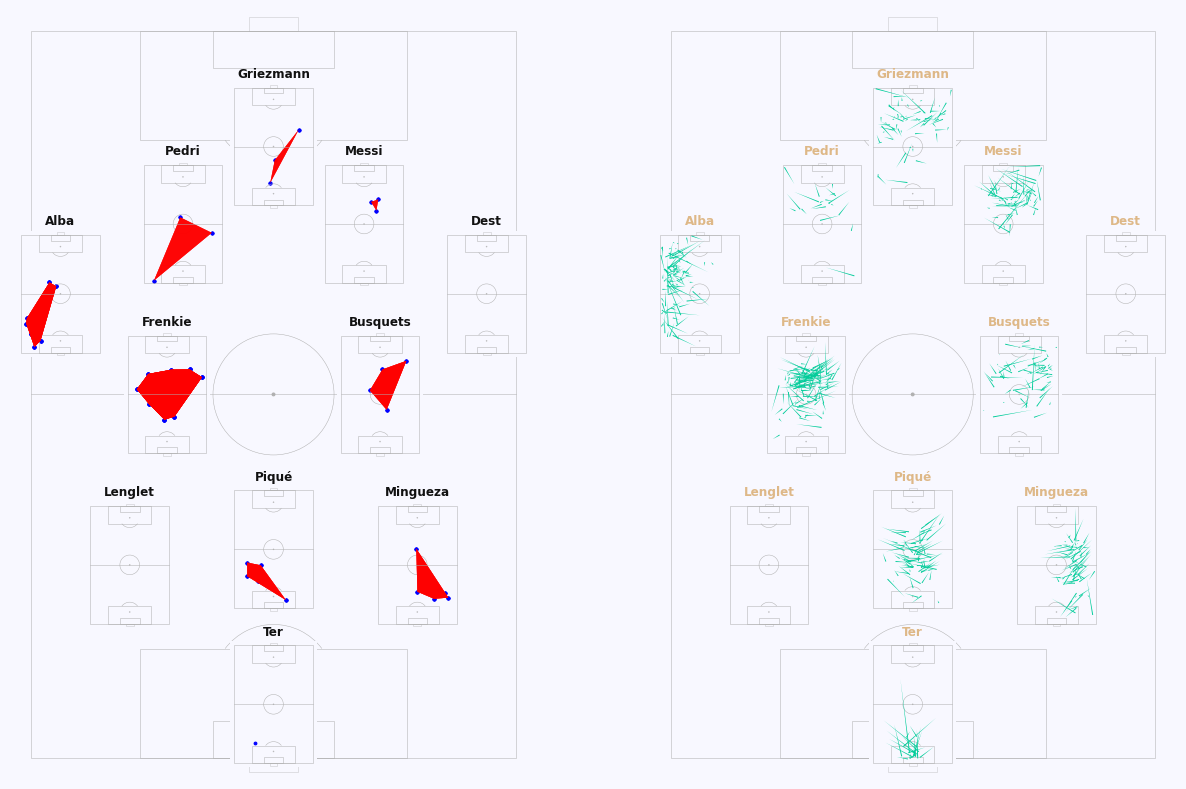

In [9]:
fig, axes = plt.subplots(1,2,figsize=(21,18))
fig.set_facecolor(whiteTheme["figBackColor"])


# im = imread(os.path.join('/work/assets/image/','barcelona_small2.png'))
# im = resize(im, (128, 125))
# fig.figimage(im, 210, 328, alpha=.8)

# im = imread(os.path.join('/work/assets/image/','villarreal-club-de-futbol-logo-DB6A3B38E2-seeklogo.com.png'))
# im = resize(im, (128, 128))
# fig.figimage(im, 848, 338, alpha=.8)

pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color=whiteTheme["axBackColor"],
#     line_color=whiteTheme["lineColor"], 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)

pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])

df = targetDf
df_barca = df[df['teamId']==teamId]
df_barca = df_barca[
    (df_barca['type.displayName']=='Tackle')|(df_barca['type.displayName']=='Interception')| \
    (df_barca['type.displayName']=='BallRecovery')|(df_barca['type.displayName']=='BlockedPass') 
]

points = df_barca[['x','y']].values

points[:,0] = points[:,0] * 1.2
points[:,1] = points[:,1] * .8

for (player_id,player_name), (x,y) in loc_dict.items():
    player_df = df_barca[df_barca['playerId']==player_id]
    points = player_df[['x','y']].values
    plot_convexfull(axes=axes[0],pdf=player_df,x=x,y=y,name=player_name)
    
df = targetDf
df_barca = df[df['teamId']==teamId]
df_barca = df_barca[df_barca['type.displayName']=='Pass']
df_barca['x'] = df_barca['x'] * 1.2
df_barca['y'] = df_barca['y'] * .8
df_barca['endX'] = df_barca['endX'] * 1.2
df_barca['endY'] = df_barca['endY'] * .8
    
for (player_id,player_name), (x,y) in loc_dict.items():
    player_df = df_barca[df_barca['playerId']==player_id]
    plot_pass(axes=axes[1],pdf=player_df,x=x,y=y,name=player_name)